In [157]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df = pd.read_csv('R01_posneg_gest_stats_fdr05.csv')
df = df.fillna(0)
df = df.drop('Unnamed: 0', axis=1)
df.head()

chem_id_s1          M331          M332          M317  \
0    158.0848_1.8326_75  23045.825630  35823.535000  630319.62080   
1    148.0886_3.6386_30  10458.087210  22666.917450   22470.49284   
2  196.0739_11.7317_477  11312.939470  11805.750800   11810.72454   
3   147.1045_3.2268_364  57086.035860  54773.941340   49929.56861   
4   147.1047_7.2359_363   5278.550989   3074.148054   11064.94004   

           M524           M102           M341          M330           M345  \
0  11513.983520  297811.478200  114689.535400  1.526648e+06  101675.769600   
1  10827.425320   46789.218190   27948.591920  1.154843e+04    5632.919047   
2  12666.187540    6031.222510   18362.414790  1.088235e+04   10880.852980   
3  38307.300710    3336.012388   72653.876750  4.950550e+04   79382.647180   
4   4009.373946    3118.598660    3163.448979  1.068195e+03    1742.752331   

            M340  ...  BH_sig_gestC  sig_gestcatC_neg  sig_gestcatC_pos  \
0  236227.322500  ...             0               0.0               0.0   
1   26539.358040  ...             0               0.0               0.0   
2   10783.164230  ...             0               0.0               0.0   
3    7772.583906  ...             0               0.0               0.0   
4    3680.435325  ...             0               0.0               0.0   

   BH_sig_gestcatC  sig_gestcatV2C_neg  sig_gestcatV2C_pos  BH_sig_gestcatV2C  \
0                0                 0.0                 0.0                  0   
1                0                 0.0                 0.0                  0   
2                0                 0.0                 0.0                  0   
3                0                 0.0                 0.0                  0   
4                0                 0.0                 0.0                  0   

   sig_gestMC_neg  sig_gestMC_pos  BH_sig_gestMC  
0             0.0             0.0              0  
1             0.0             0.0              0  
2             0.0             0.0              0  
3             0.0             0.0              0  
4             0.0             0.0              0  

[5 rows x 648 columns]

In [159]:
df = df[(df['Sodium_Adduct'] == 0) & (df['Adduct_filter']== 0)]
df = df[(df['Potasium_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['Ammonium_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['ACN_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['Formate_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['H2O_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[(df['CO2_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
df = df[df['pos_neg_dup'] == 0]

In [160]:
df = df.set_index('iso_id_esi')
df['species1'] = np.where(df['Met_Presence'] == 1, 'endogenous', 'exogenous')

In [161]:
df['species1']

iso_id_esi
C10H10N2_1.0_pos     exogenous
C10H12O_1.0_pos      exogenous
C10H12O4_1.0_pos    endogenous
C10H13N_1.0_pos      exogenous
C10H13N_2.0_pos      exogenous
                       ...    
C9H8N2O_1.0_neg      exogenous
C9H8O_1.0_neg        exogenous
C9H8O2_1.0_neg      endogenous
C9H8O3_1.0_neg      endogenous
C9HF17O2_1.0_neg     exogenous
Name: species1, Length: 740, dtype: object

In [162]:
dfH = df.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

In [163]:
lut1 = dict(zip(df['species1'].unique(), ["darkgray","red"]))
row_colors1 = df['species1'].map(lut1)

In [164]:
row_colors1

iso_id_esi
C10H10N2_1.0_pos    darkgray
C10H12O_1.0_pos     darkgray
C10H12O4_1.0_pos         red
C10H13N_1.0_pos     darkgray
C10H13N_2.0_pos     darkgray
                      ...   
C9H8N2O_1.0_neg     darkgray
C9H8O_1.0_neg       darkgray
C9H8O2_1.0_neg           red
C9H8O3_1.0_neg           red
C9HF17O2_1.0_neg    darkgray
Name: species1, Length: 740, dtype: object

In [165]:
col_names = dfH.columns.values
col_namesDF = pd.DataFrame(col_names, columns=['columns'])

In [166]:
col_namesDF['species'] = np.where(col_namesDF['columns'].str.contains('M'), 'orange', 'dodgerblue')
col_namesDF = col_namesDF.set_index('columns')
col_namesDF

species
columns            
M331         orange
M332         orange
M317         orange
M524         orange
M102         orange
...             ...
849C     dodgerblue
839C     dodgerblue
842C     dodgerblue
846C     dodgerblue
845C     dodgerblue

[588 rows x 1 columns]

sns.set(font_scale=0.6)
g = sns.clustermap(dfH, cmap="Blues", vmin=0, vmax=10, row_colors=row_colors, col_colors=col_namesDF)

In [167]:
from scipy import stats
df_m = pd.read_csv('medicalrecabstraction.csv', sep=',')

In [168]:
col_namesDF = pd.read_csv('gestational_age_imputed_v2.csv')
col_namesDF = col_namesDF.drop('Unnamed: 0', axis=1)
col_namesDF

ppt_id  log_ga_days columns     species  ga_weeks_mr  ga_days_mr  \
0       331     2.439333    M331      orange         39.0         2.0   
1       331     2.439333    C331  dodgerblue         39.0         2.0   
2       332     2.434569    M332      orange         38.0         6.0   
3       317     2.451786    M317      orange         40.0         3.0   
4       317     2.451786    C317  dodgerblue         40.0         3.0   
..      ...          ...     ...         ...          ...         ...   
583     842     2.432292    842C  dodgerblue          NaN         NaN   
584     846     2.446761    846M      orange          NaN         NaN   
585     846     2.446761    846C  dodgerblue          NaN         NaN   
586     845     2.420100    845M      orange          NaN         NaN   
587     845     2.420100    845C  dodgerblue          NaN         NaN   

     ga_tdays_mr  ga_days_mr_total  
0          275.0        275.000000  
1          275.0        275.000000  
2          272.0        272.000000  
3          283.0        283.000000  
4          283.0        283.000000  
..           ...               ...  
583          NaN        270.577638  
584          NaN        279.744451  
585          NaN        279.744451  
586          NaN        263.087186  
587          NaN        263.087186  

[588 rows x 8 columns]

In [169]:
col_namesDF.columns = col_namesDF.columns.str.replace('species', 'species1')

col_namesDF['species2_1'] = np.where(col_namesDF['ga_days_mr_total'] < 260, 'navy', '')
col_namesDF['species2_2'] = np.where(col_namesDF['ga_days_mr_total'] > 260, 'skyblue', '')

col_namesDF['species2'] = col_namesDF['species2_1']+col_namesDF['species2_2']
col_namesDF = col_namesDF.drop(['species2_1', 'species2_2'], axis=1)

In [170]:
col_namesDF

ppt_id  log_ga_days columns    species1  ga_weeks_mr  ga_days_mr  \
0       331     2.439333    M331      orange         39.0         2.0   
1       331     2.439333    C331  dodgerblue         39.0         2.0   
2       332     2.434569    M332      orange         38.0         6.0   
3       317     2.451786    M317      orange         40.0         3.0   
4       317     2.451786    C317  dodgerblue         40.0         3.0   
..      ...          ...     ...         ...          ...         ...   
583     842     2.432292    842C  dodgerblue          NaN         NaN   
584     846     2.446761    846M      orange          NaN         NaN   
585     846     2.446761    846C  dodgerblue          NaN         NaN   
586     845     2.420100    845M      orange          NaN         NaN   
587     845     2.420100    845C  dodgerblue          NaN         NaN   

     ga_tdays_mr  ga_days_mr_total species2  
0          275.0        275.000000  skyblue  
1          275.0        275.000000  skyblue  
2          272.0        272.000000  skyblue  
3          283.0        283.000000  skyblue  
4          283.0        283.000000  skyblue  
..           ...               ...      ...  
583          NaN        270.577638  skyblue  
584          NaN        279.744451  skyblue  
585          NaN        279.744451  skyblue  
586          NaN        263.087186  skyblue  
587          NaN        263.087186  skyblue  

[588 rows x 9 columns]

In [171]:
col_namesDF = col_namesDF.set_index('columns')
col_namesDF = col_namesDF.loc[:, ['species1', 'species2']]

In [172]:
col_namesDF['species2'].value_counts()

skyblue    536
navy        52
Name: species2, dtype: int64

In [173]:
print((54+80)/588*100)

22.789115646258505


sns.set(font_scale=0.7)
g = sns.clustermap(dfH, cmap='YlGnBu_r', vmin=0, vmax=10, row_colors=row_colors1, col_colors=col_namesDF, colors_ratio=0.02)
#g.savefig('clustermapMC.tiff', dpi=300)

sns.set(font_scale=0.7)
g = sns.clustermap(dfHM, cmap='YlGnBu_r', vmin=0, vmax=10, row_colors=row_colors1, col_colors=col_namesDF, colors_ratio=0.02)
#g.savefig('clustermapM.tiff', dpi=300)

sns.set(font_scale=0.7)
g = sns.clustermap(dfHC, cmap='YlGnBu_r', vmin=0, vmax=10, row_colors=row_colors1, col_colors=col_namesDF, colors_ratio=0.02)
#g.savefig('clustermapC.tiff', dpi=300)

df = pd.read_csv('R01_posneg_gest_stats.csv')
df = df.fillna(0)
df = df.drop('Unnamed: 0', axis=1)
df.head()

In [174]:
dfs = df.loc[(df['sig_mvc_neg'] == 1)|(df['sig_mvc_pos'] == 1)]

In [175]:
df.shape, dfs.shape

((740, 648), (485, 648))

In [176]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


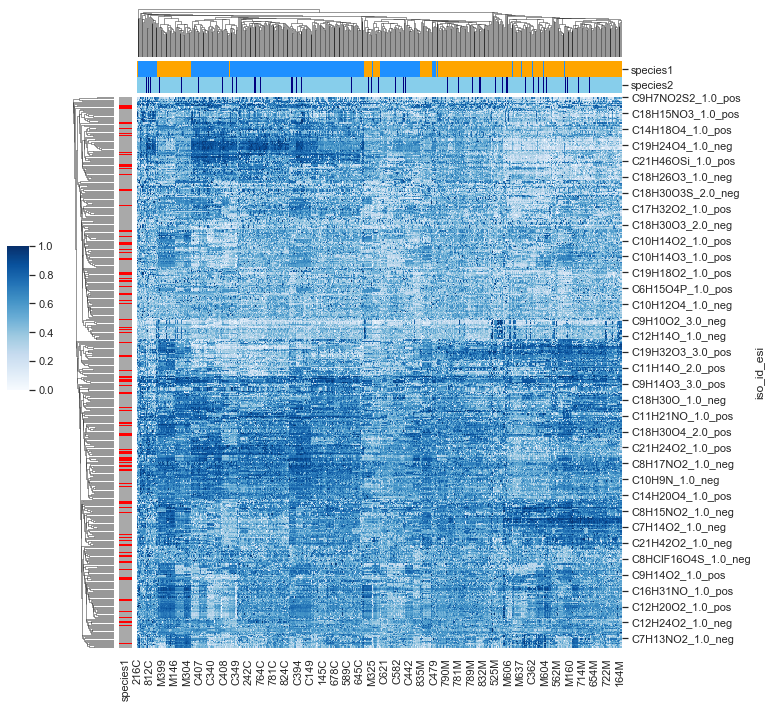

In [177]:
sns.set(font_scale=1)
g = sns.clustermap(dfH, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapMC_standard_scale_simple_MCdiff.png', dpi=300)

In [178]:
dfs = df.loc[(df['BH_sig_mvc'] == 1)]

In [179]:
df.shape, dfs.shape

((740, 648), (463, 648))

In [180]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

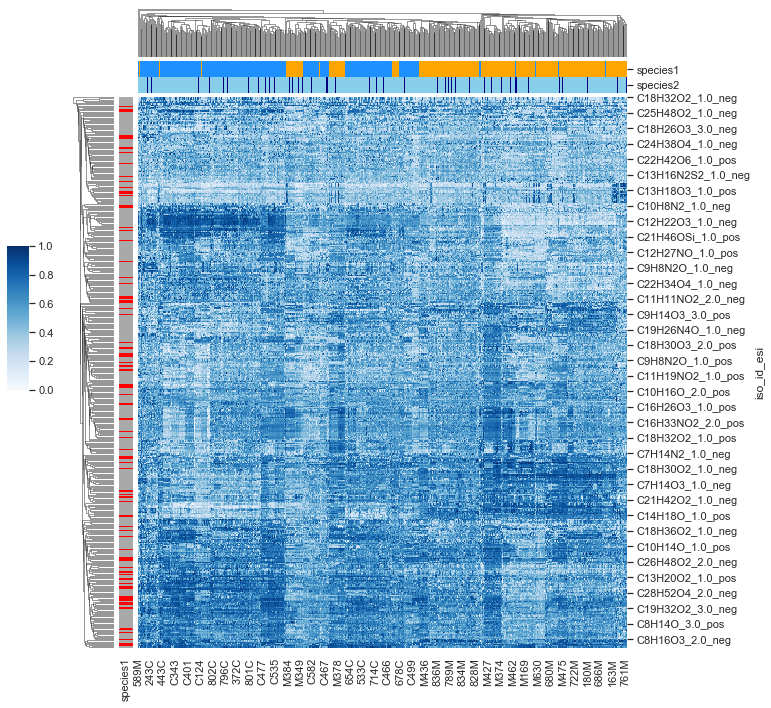

In [181]:
sns.set(font_scale=1)
g = sns.clustermap(dfH, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapMC_standard_scale_simple_MCdiff_BH.png', dpi=300)

In [182]:
dfs = df.loc[(df['sig_gestcatV2M_pos'] == 1)|(df['sig_gestcatV2M_neg'] == 1)|
             (df['sig_gestcatV2C_pos'] == 1)|(df['sig_gestcatV2C_neg'] == 1)]

In [183]:
df.shape, dfs.shape

((740, 648), (162, 648))

In [184]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

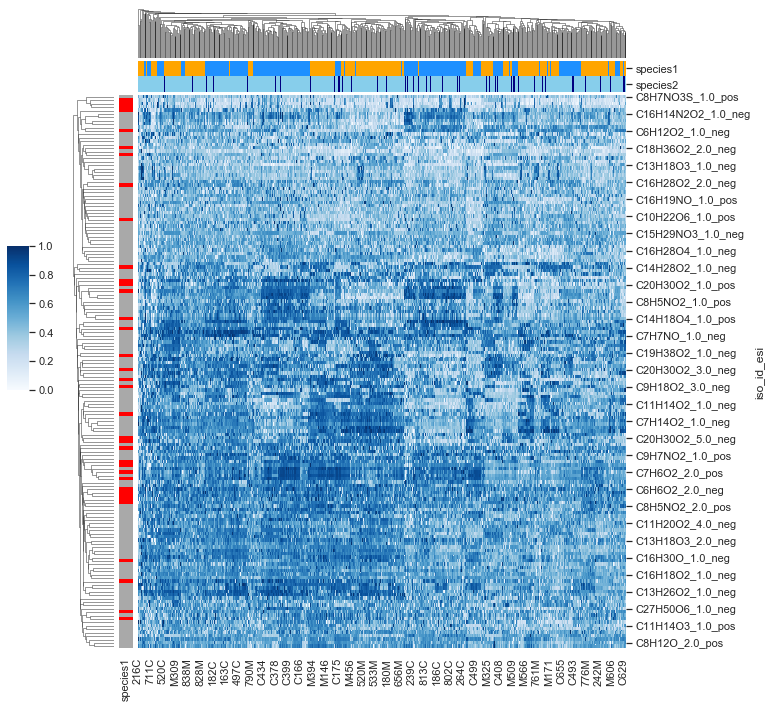

In [185]:
sns.set(font_scale=1)
g = sns.clustermap(dfH, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapMC_standard_scale_simple_PTB2cat.png', dpi=300)

In [186]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

In [187]:
df.shape, dfs.shape

((740, 648), (162, 648))

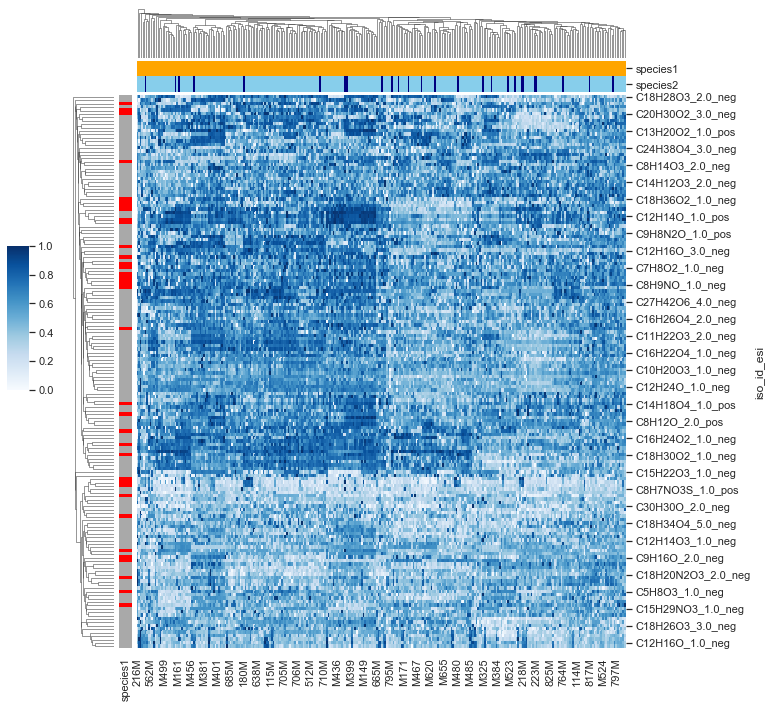

In [188]:
sns.set(font_scale=1)
g = sns.clustermap(dfHM, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapM_standard_scale_simple_PTB2cat.png', dpi=300)

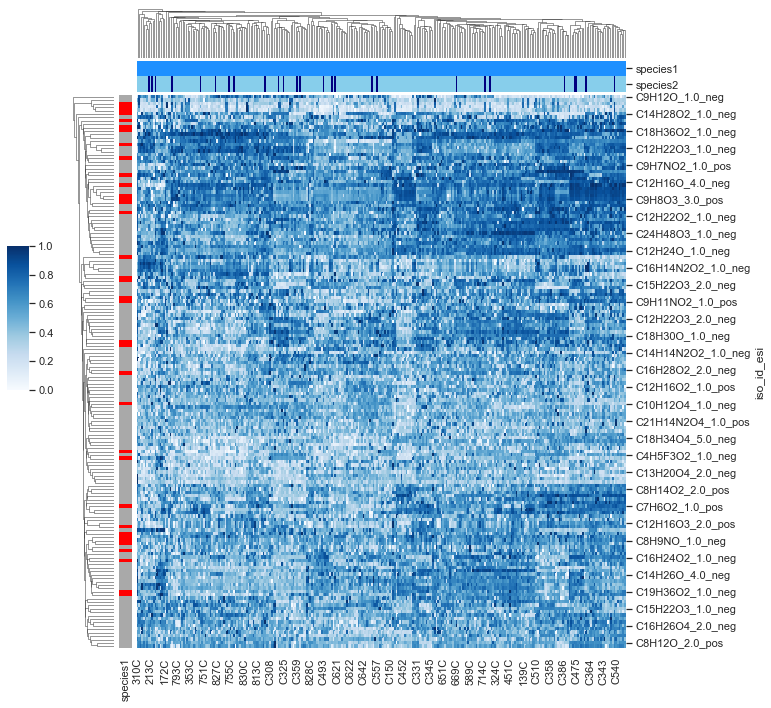

In [189]:
sns.set(font_scale=1)
g = sns.clustermap(dfHC, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapC_standard_scale_simple_PTB2cat.png', dpi=300)

sns.set(font_scale=0.8)
g = sns.clustermap(dfH, cmap='YlGnBu_r', row_colors=row_colors, col_colors=col_namesDF, 
                   colors_ratio=(0.015, 0.02), z_score=0, 
                   dendrogram_ratio=0.1, cbar_pos=(-0.06, .3, .03, .4))
g.savefig('clustermapMC_BH_z_score.tiff', dpi=300)

In [190]:
dfs = df.loc[(df['BH_sig_gestcatV2M'] == 1)|(df['BH_sig_gestcatV2C'] == 1)]

In [191]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

In [192]:
dfHM.shape

(6, 294)

In [193]:
dfHC.shape

(6, 294)

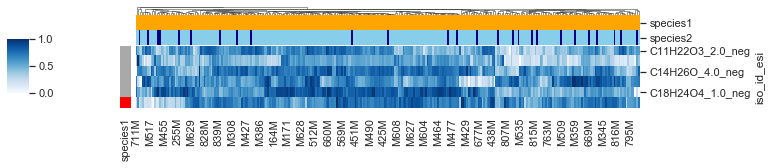

In [194]:
sns.set(font_scale=1)
g = sns.clustermap(dfHM, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, row_cluster=False, 
                   colors_ratio=(0.02, 0.15), standard_scale=0, figsize=(10, 2.5),
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .3))
g.savefig('clustermapM_standard_scale_simple_PTB2cat_BH.png', dpi=300)

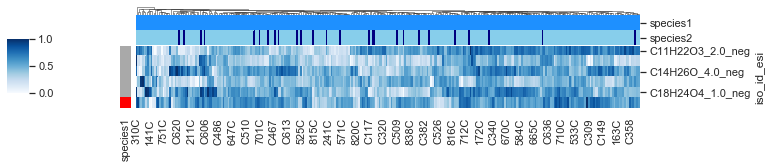

In [195]:
sns.set(font_scale=1)
g = sns.clustermap(dfHC, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, row_cluster=False, 
                   colors_ratio=(0.02, 0.15), standard_scale=0, figsize=(10, 2.5),
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .3))
g.savefig('clustermapC_standard_scale_simple_PTB2cat_BH.png', dpi=300)

In [196]:
dfs = df.loc[(df['sig_gestM_pos'] == 1)|(df['sig_gestM_neg'] == 1)|
             (df['sig_gestC_pos'] == 1)|(df['sig_gestC_neg'] == 1)]

In [197]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

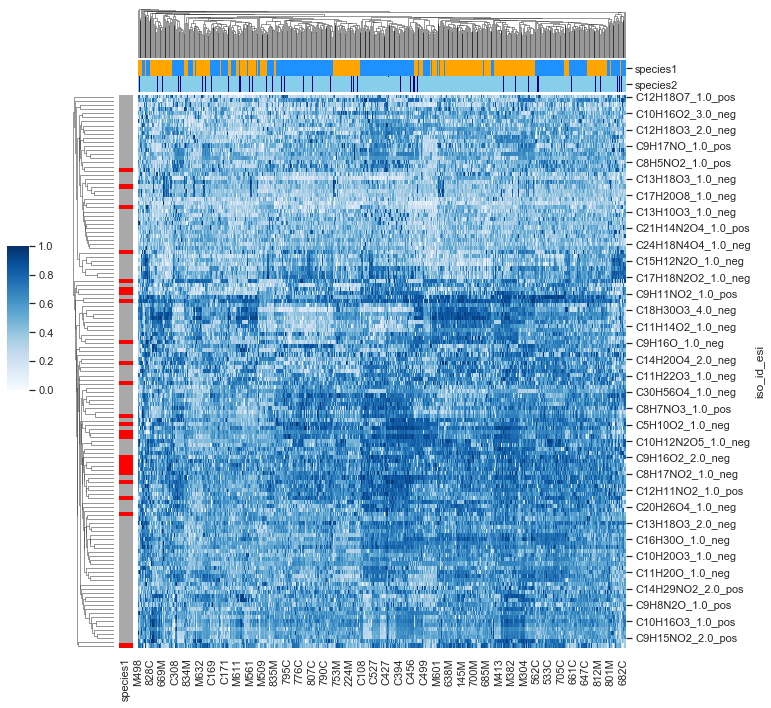

In [198]:
sns.set(font_scale=1)
g = sns.clustermap(dfH, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapMC_standard_scale_simple_PTBnumerical.png', dpi=300)

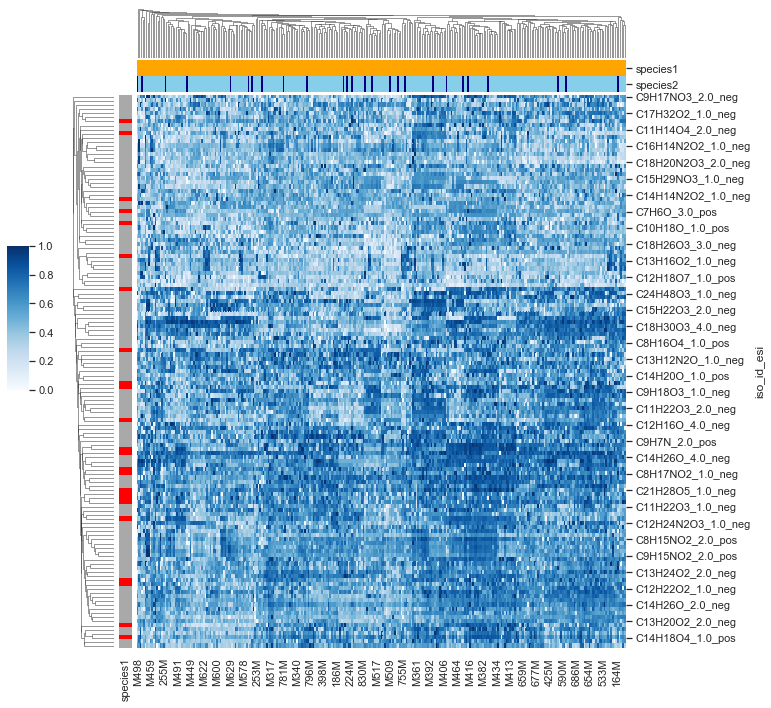

In [199]:
sns.set(font_scale=1)
g = sns.clustermap(dfHM, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapM_standard_scale_simple_PTBnumerical.png', dpi=300)

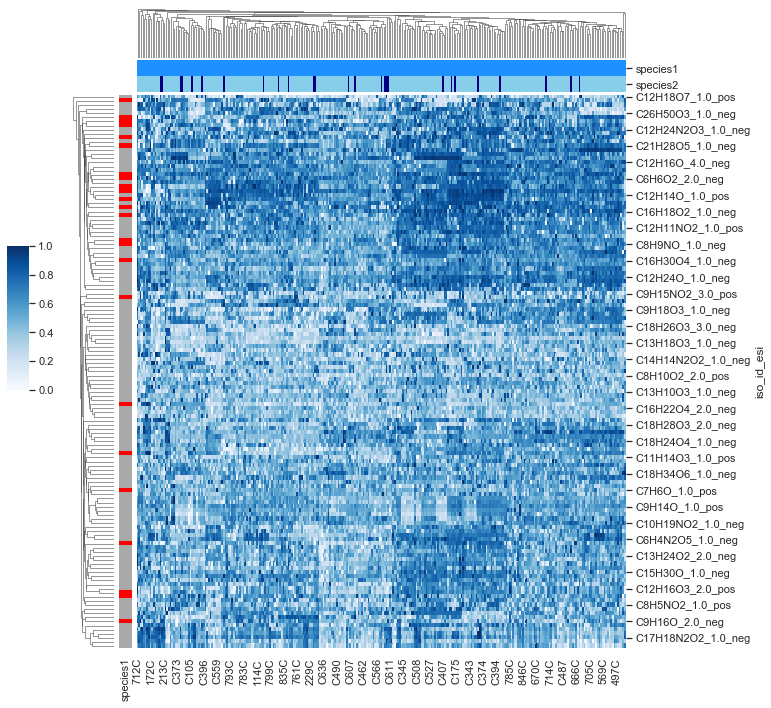

In [200]:
sns.set(font_scale=1)
g = sns.clustermap(dfHC, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapC_standard_scale_simple_PTBnumerical.png', dpi=300)

In [201]:
dfs = df.loc[(df['BH_sig_gestM'] == 1)|(df['BH_sig_gestC'] == 1)]

In [202]:
dfs.shape

(0, 648)

In [203]:
dfs = df.loc[(df['sig_gestM_pos'] == 1)|(df['sig_gestM_neg'] == 1)]

In [204]:
dfs.shape

(78, 648)

In [205]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

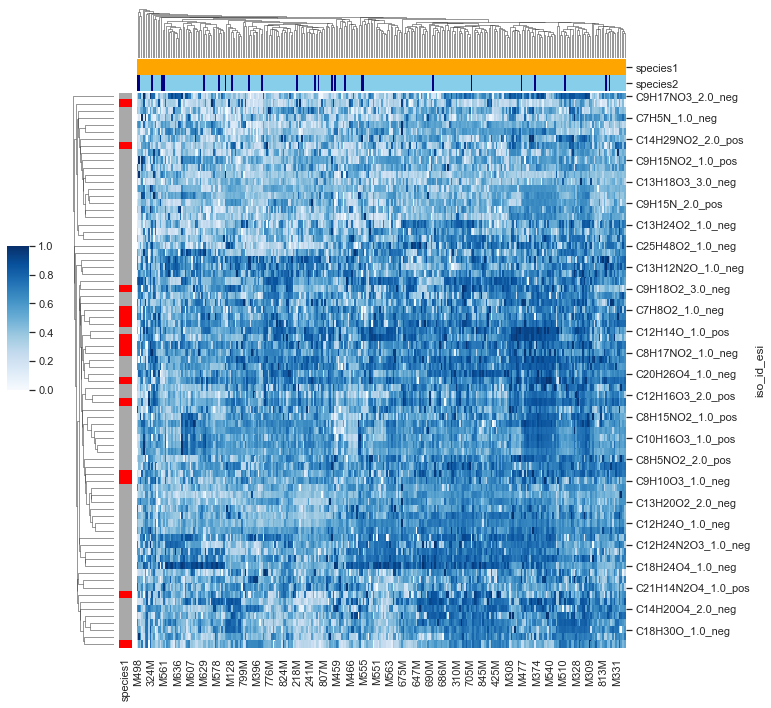

In [206]:
sns.set(font_scale=1)
g = sns.clustermap(dfHM, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapM_standard_scale_simple_PTBnumerical_Monly.png', dpi=300)

In [207]:
dfs = df.loc[(df['sig_gestC_pos'] == 1)|(df['sig_gestC_neg'] == 1)]

In [208]:
dfs.shape

(74, 648)

In [209]:
dfH = dfs.loc[:,'M331':'845C']
dfH = np.log10(dfH)
dfHM = dfH.loc[:, dfH.columns.str.contains('M')]
dfHC = dfH.loc[:, dfH.columns.str.contains('C')]

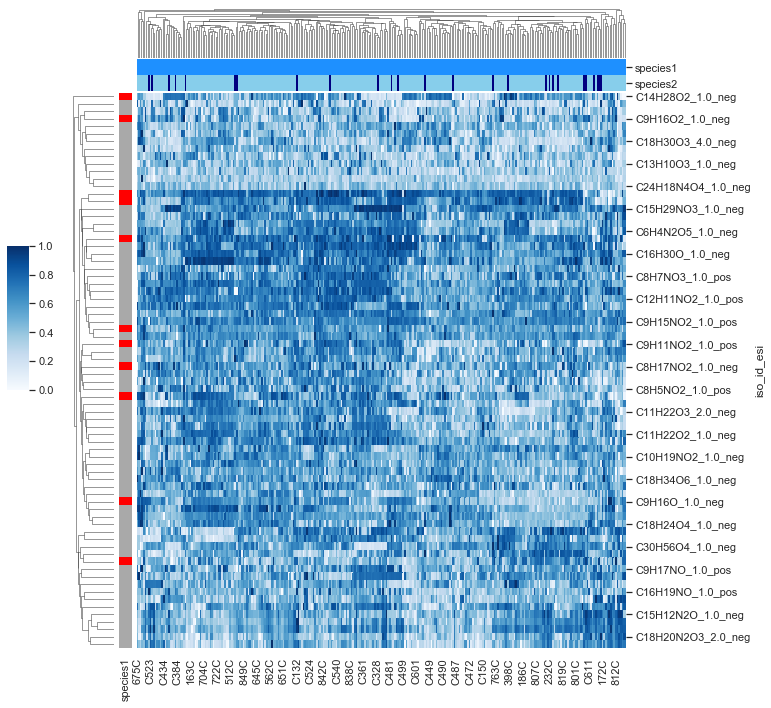

In [210]:
sns.set(font_scale=1)
g = sns.clustermap(dfHC, cmap='Blues', row_colors=row_colors1, col_colors=col_namesDF, 
                   colors_ratio=(0.025, 0.025), standard_scale=0, 
                   dendrogram_ratio=0.08, cbar_pos=(-0.07, .45, .03, .2))
g.savefig('clustermapC_standard_scale_simple_PTBnumerical_Conly.png', dpi=300)